In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import utils
def get_eval_data(checkpoint):
	checkpoint = torch.load(checkpoint)
	metrics = checkpoint['conf_flat']	
	data = [utils.print_metrics(m.compute()) for m in metrics]
	return data

C:\Users\eros\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
t8 =  "D:\\weights\\ablation\\dataset\\checkpoint20_t8"
t9 =  "D:\\weights\\ablation\\dataset\\checkpoint50_t9"
t12 = torch.load(checkpoint_t12)['training_loss_values']
t13 = torch.load(checkpoint_t13)['training_loss_values']

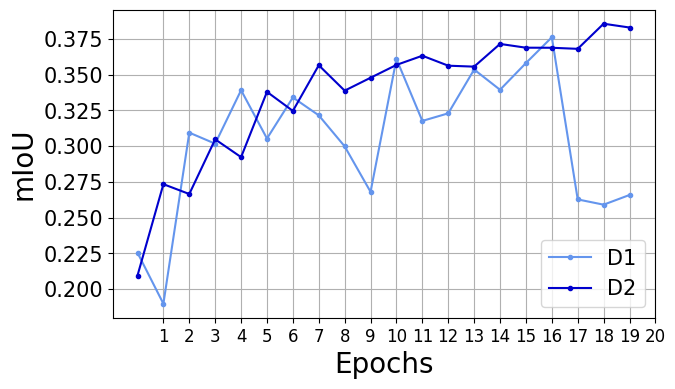

In [92]:
mIoU_t8 = [x['mIoU'] for x in t8_data]
mIoU_t9 = [x['mIoU'] for x in t9_data]
plt.subplots(figsize=(7, 4))
plt.grid()
colors = ['cornflowerblue', 'mediumblue']
plt.plot(mIoU_t8, marker='.', label='D1', color=colors[0])
plt.plot(mIoU_t9[:20], marker='.', label='D2', color=colors[1])
plt.xticks(range(1,21))
plt.xlabel('epochs')
plt.ylabel('mIoU')
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("mIoU", fontsize=20)
plt.legend(loc='lower right', prop={'size': 15})
plt.show()

In [31]:
def get_means(data, group):
    return [np.mean(data[i:i+group]) for i in range(0, len(data), group)]
    

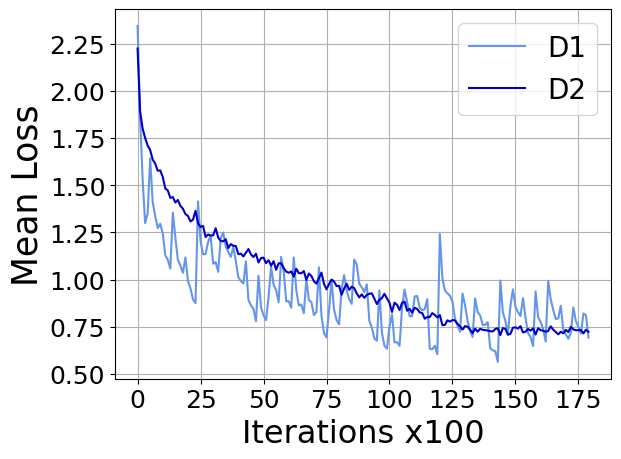

In [53]:
# checkpoint_t12 = "D:\\weights\\ablation\\background\\checkpoint50_t12"
# checkpoint_t13 = "D:\\weights\\ablation\\background\\checkpoint50_t13"
checkpoint_t12="D:\\weights\\ablation\\dataset\\checkpoint20_t8"
checkpoint_t13="D:\\weights\\ablation\\dataset\\checkpoint50_t9"
t12 = torch.load(checkpoint_t12)['training_loss_values']
t13 = torch.load(checkpoint_t13)['training_loss_values']
chunk = 100
cut = 180
# colors = ['darkgreen', 'mediumseagreen']
colors = ['cornflowerblue', 'mediumblue']
plt.plot(get_means(t12, chunk)[:cut], label='D1', color=colors[0])
plt.plot(get_means(t13, chunk)[:cut], label='D2', color=colors[1])
plt.grid()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("Iterations x100", fontsize=23)
plt.ylabel("Mean Loss", fontsize=25)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

In [ ]:
plt.plot(get_means(t12, chunk)[:800], label='D1', color=colors[0])
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("Iterations x100", fontsize=25)
plt.ylabel("Mean Loss", fontsize=25)
plt.grid()
plt.legend(loc='upper right', prop={'size': 20})


In [13]:
import utils
t12_norm = torch.load(checkpoint_t12)['conf_normalized'][-1]
t12_flat = torch.load(checkpoint_t12)['conf_flat'][-1]
t13_flat = torch.load(checkpoint_t13)['conf_flat'][-1]
t13_norm = torch.load(checkpoint_t13)['conf_normalized'][-1]

In [5]:
import utils
def get_mIoUs(checkpoint, exclude_background=False, metric=None):
    mats = torch.load(checkpoint)['conf_flat']
    if exclude_background:
        for i,mat in enumerate(mats):            
            mat.confmat[0,:] = 0
    print(f"total pixels: {torch.sum(mats[-1].confmat)}")
    if metric:
        return [utils.print_metrics(mat.compute(),silent=True)[metric] for mat in mats]    
    else:
        return [utils.print_metrics(mat.compute(),silent=True) for mat in mats]    


total pixels: 312249878
total pixels: 312249878


[]

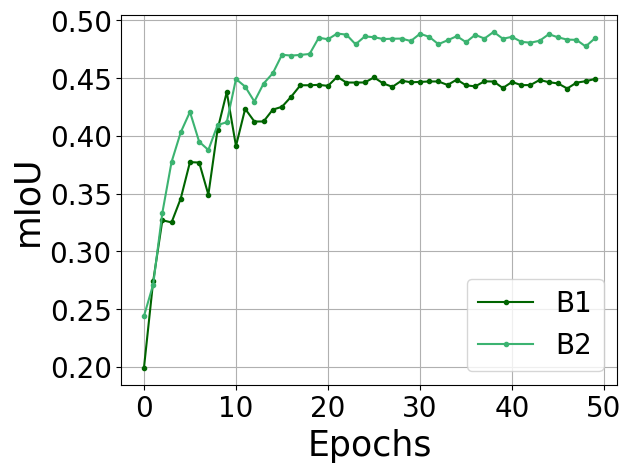

In [25]:
checkpoint_t12 = "D:\\weights\\ablation\\background\\checkpoint50_t12"
checkpoint_t13 = "D:\\weights\\ablation\\background\\checkpoint50_t13"
t12 = torch.load(checkpoint_t12)['training_loss_values']
t13 = torch.load(checkpoint_t13)['training_loss_values']
scores_t12 = get_mIoUs(checkpoint_t12, exclude_background=True, metric='mIoU') # vanilla
scores_t13 = get_mIoUs(checkpoint_t13, exclude_background=True, metric='mIoU') # exclude background
plt.grid()
plt.plot(scores_t12, marker='.', label='B1', color='darkgreen')
plt.plot(scores_t13, marker='.', label='B2', color='mediumseagreen')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc='lower right', prop={'size': 20})
plt.xlabel("Epochs", fontsize=25)
plt.ylabel("mIoU", fontsize=25)
plt.plot(dpi=700)

total pixels: 481689600
total pixels: 481689600
{'perclass_IoU': [0.5742387771606445, 0.5032227039337158, 0.5890182852745056, 0.4871719479560852, 0.4083423614501953, 0.030503034591674805, 0.6912341713905334, 0.009290172718465328, 0.03969553858041763, 0.7569209933280945, 0.0022208415903151035, 0.51566481590271, 0.18333011865615845, 0.4258231222629547, 0.13681761920452118, 0.3768683671951294], 'mIoU': 0.35814765095710754, 'precision_score': 0.5759318470954895, 'recall_score': 0.48669442534446716, 'dice_score': 0.47429370880126953, 'oa_score': 0.7114946388711735}


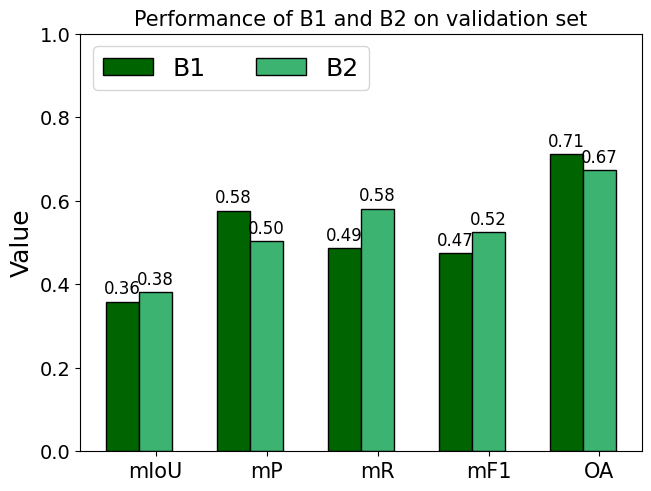

In [91]:
# checkpoint_t12 = "D:\\weights\\ablation\\background\\checkpoint50_t12"
# checkpoint_t13 = "D:\\weights\\ablation\\background\\checkpoint50_t13"
# checkpoint_t12  = "D:\\weights\\ablation\\dataset\\checkpoint16_t8"
# checkpoint_t13  = "D:\\weights\\ablation\\dataset\\checkpoint50_t9"

checkpoint_t12="D:\\weights\\ablation\\dataset\\checkpoint16_t8"
checkpoint_t13="D:\\weights\\ablation\\dataset\\checkpoint50_t9"
t12 = torch.load(checkpoint_t12)['training_loss_values']
t13 = torch.load(checkpoint_t13)['training_loss_values']
metrics_t12 = get_mIoUs(checkpoint_t12, exclude_background=False)[-1] # vanilla
metrics_t13 = get_mIoUs(checkpoint_t13, exclude_background=False)[-1] # exclude background
metrics = ('mIoU', 'mP', 'mR', 'mF1', 'OA')
print(metrics_t12)
# colors = ['cornflowerblue', 'mediumblue']
colors = ['darkgreen', 'mediumseagreen']
values = {
    'B1':(metrics_t12['mIoU'],metrics_t12['precision_score'],metrics_t12['recall_score'],metrics_t12['dice_score'],metrics_t12['oa_score']),
    'B2':(metrics_t13['mIoU'],metrics_t13['precision_score'],metrics_t13['recall_score'],metrics_t13['dice_score'],metrics_t13['oa_score']),
}
x = np.arange(len(metrics))  # the label locations
width = 0.3 # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for i,(attribute, measurement) in enumerate(values.items()):
    offset = width * multiplier    
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black', color=colors[i%2])
    # rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black')
    ax.bar_label(rects, padding=3,fmt='%.2f', fontsize=12)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value', fontsize=18)
ax.set_title('Performance of B1 and B2 on validation set', fontsize=15)
ax.set_xticks(x + width, metrics, fontsize=15)
ax.legend(loc='upper left', ncols=3, prop={'size': 18})
ax.set_ylim(0, 1)
plt.yticks(fontsize=14)
plt.show()